In [1]:

import numpy as np
from matplotlib import pyplot
from matplotlib.pyplot import cm
import scipy.fftpack
from scipy import signal
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import operator
import collections
%matplotlib notebook


In [2]:
#custom functions

def norm(A):
    Amax=np.max(A)
    norm=A/Amax
    return norm

def dB(A):
    A=20*np.log10(norm(A))
    return A

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

#clean data
def clean(arr):
    indices = np.where(arr == 0.0)
    for ind in indices:
           #print ind
        arr[ind] = (arr[ind - 1] + arr[ind + 1]) / 2
    return arr

#shift
def shift(x, zero):
    x=clean(x)+zero
    return x

#convert to time
def time(x):
    t=-x*3.3333*2
    return t

#get time step
def tstep(t):
    dt=t[2]-t[1]
    return dt
    
#sort FFTs
def ascend(x,y):
    L=sorted(zip(x,y), key=operator.itemgetter(0))
    x, y = zip(*L)
    f=[]
    fft=[]
    f.append(x)
    fft.append(y)
    f = np.array(f)
    fft = np.array(fft)
    #fft=fft[::-1]
    f=f[0]
    fft=fft[0]
    return f, fft

#windowing function for the data
def window(v):
    n=np.size(v)
    center=np.argmax(v)
    z=np.zeros(center)
    vz=np.append(v,z)
    win=signal.hamming(np.size(vz))
    vw=win*vz
    vw=vw[0:401]
    return vw

In [98]:
x0,v0=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/h-nopol-3.dat',unpack=True)

x1,v1=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/h-nopol-5.dat',unpack=True)

x2,v2=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/h-nopol-4.dat',unpack=True)

x3,v3=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/s-nopol-1.dat',unpack=True) #normal
    
x4,v4=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/s-p0-2.dat',unpack=True)

x5,v5=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/h-p0-2.dat',unpack=True)

x6,v6=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/s-p8-2.dat',unpack=True)
    
x7,v7=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/h-p8-2.dat',unpack=True)

x8,v8=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/s-p38-1.dat',unpack=True)

x9,v9=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/h-p38-2.dat',unpack=True)

x10,v10=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/s-p68-1.dat',unpack=True)

x11,v11=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/h-p68-1.dat',unpack=True)

x12,v12=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/s-p352-1.dat',unpack=True)

x13,v13=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/h-p352-2.dat',unpack=True)

x14,v14=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/s-nopol-6.dat',unpack=True)

x15,v15=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/sample3/071017/h-nopol-6.dat',unpack=True)
#x10,v10=np.genfromtxt('/Users/arielle/Documents/Research/OrensteinLab/LowPowerTHzdata/RuCl/020817/alt_hole1.dat',unpack=True)

files = 16

In [99]:
#clean and convert all data
for i in range(files):
    x=eval('x'+str(i))
    x=clean(x)
    #print i
    #x=shift(x,zero) 
    t=time(x)
    dt=tstep(t)
    n=np.size(x)
    print i
    vars()['x' + str(i)]=x
    vars()['t' + str(i)]=t
    vars()['dt' + str(i)]=dt
    vars()['n' + str(i)]=n


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [100]:
#run if not windowing. 
for i in range(files):
    v=eval('v'+str(i))
    n=np.size(v)
    vw=v
    vars()['vw'+str(i)]=vw
    
for i in range(files):
    vw=eval('vw'+str(i))
    n=np.size(vw)
    dt=eval('dt'+str(i))
    fftr = (np.fft.rfft(vw))
    fftc = (np.fft.fft(vw))
    fc = np.fft.fftfreq(n,dt)
    f = np.abs(fc[0:n/2+1])
    fft = np.absolute(fftr)
    #f=np.linspace(0,np.size(fftr)*0.13332, np.size(fftr))
    fftD=dB((fft))
    phase=np.angle(fftr)
    ffti=np.imag(fftr)
    fftre=np.real(fftr)
    vars()['fftr' + str(i)]=fftr
    vars()['fftc' + str(i)]=fftc
    vars()['fftre' + str(i)]=fftre
    vars()['fft' + str(i)]=fft
    vars()['ffti' + str(i)]=ffti
    vars()['fftD' + str(i)]=fftD
    vars()['f' + str(i)]=f
    vars()['fc' + str(i)]=fc
    vars()['phase' + str(i)]=phase
    

In [89]:
pyplot.plot(t1, v1, 'r')
pyplot.plot(t0, v0)
pyplot.plot(t2, v2)

In [90]:
###Echo is at 18 ps. thickness is: 
d=18e-12*3e8/(2*2.5)
print d

n=2.5
R=(4*n)/((n+1)**2)

#this is consistent with the previous measurement...

0.00108


In [91]:
pyplot.plot(f0, fft2/fft1, 'b.-')
#pyplot.plot(f0, fft2/fft3, 'g.-')
pyplot.ylim(0.9,1.1)
pyplot.xlim(0,2)

(0, 2)

<IPython.core.display.Javascript object>


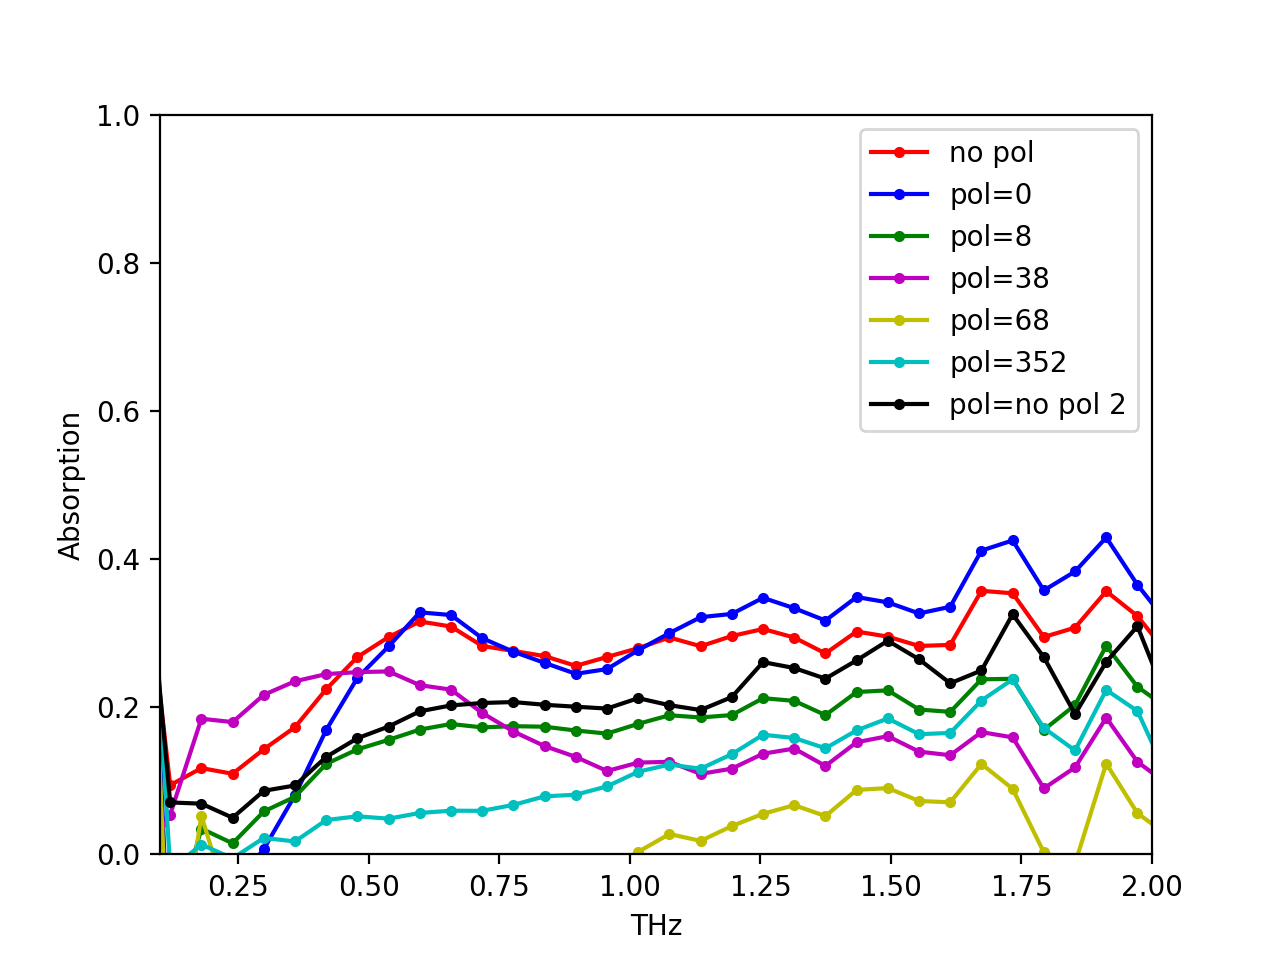

In [104]:
pyplot.plot(f0, -np.log(fft3/fft2*1/R), 'r.-', label='no pol')
pyplot.plot(f0, -np.log(fft4/fft5*1/R), 'b.-' , label='pol=0')
pyplot.plot(f0, -np.log(fft6/fft7*1/R), 'g.-' , label='pol=8')
pyplot.plot(f0, -np.log(fft8/fft9*1/R), 'm.-' , label='pol=38')
pyplot.plot(f0, -np.log(fft10/fft11*1/R), 'y.-' , label='pol=68')
pyplot.plot(f0, -np.log(fft12/fft13*1/R), 'c.-' , label='pol=352')
pyplot.plot(f0, -np.log(fft14/fft15*1/R), 'k.-' , label='pol=no pol 2')
pyplot.legend()
pyplot.ylim(0,1.0)
pyplot.xlim(0.1,2)
pyplot.xlabel('THz')
pyplot.ylabel('Absorption')
pyplot.savefig('071017_a.png', dpi=180)

In [84]:
### very weird that -8 is so far from zero. going back to zero for a sanity check. 

<IPython.core.display.Javascript object>


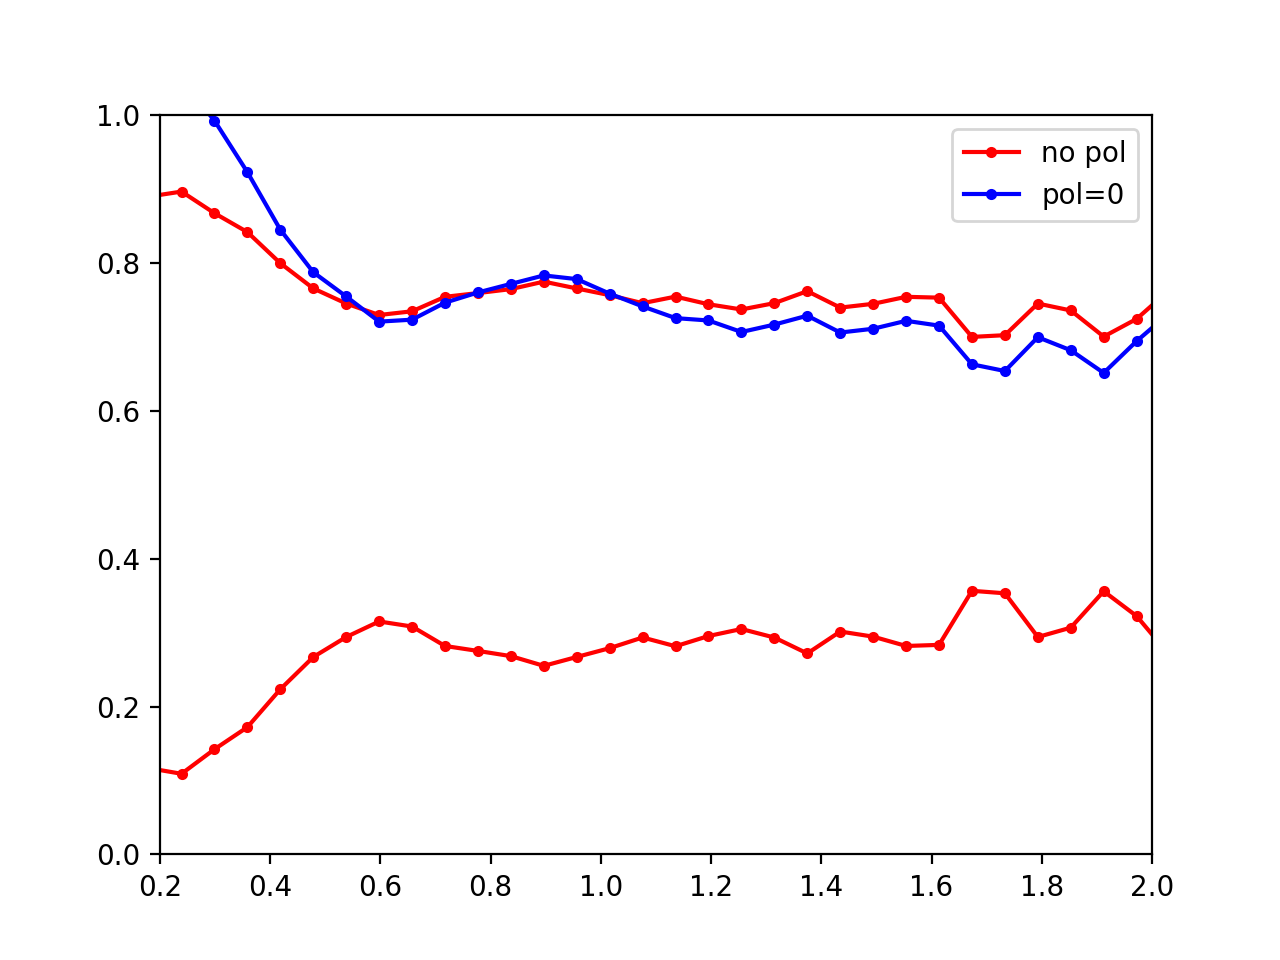

(0.2, 2)

In [39]:
pyplot.plot(f0, -np.log(fft3/fft2*1/R), 'r.-')
#pyplot.plot(f0, -np.log(fft3/fft1*1/R), 'b.-')
#pyplot.plot(f0, -np.log(fft5/fft4*1/R), 'g.-')
#pyplot.plot(f6, -np.log(fft6/fft7*1/R), 'y.-')
pyplot.ylim(0,1.5)
pyplot.xlim(0.2,2)

In [1]:
#echo is at
print "Hello Arielle. Just making some changes to your program :-)"


SyntaxError: Missing parentheses in call to 'print' (<ipython-input-1-a0a90b501b38>, line 2)

In [3]:
print ("Hello Arielle. Just making some changes to your program.")

Hello Arielle. Just making some changes to your program.
